# Introduction


In this homework, you'll be required to load in a dataset which has about 500 features. By using
Lasso ($L^1$) regression, we'll find the optimal constraint on the $L^1$ norm which gives us the best
$R^2$. Then we'll plot the results.

Recall we minimize the following on ** training data: $(x_i,y_i)$**

$$\min_{\beta} \frac{1}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i)^2 + \lambda \|\beta \|_{L^1}.$$


Denoting $\beta_{\lambda}$ as the minimum of the above, we then choose $\lambda$ to maximize $R^2$ on **testing data: $(x_j,y_j)$**

$$ \max_{\lambda} 1 - \frac{\sum_{j} (y_j - \beta_{\lambda} \cdot x_j)^2}{\sum_j (y_j - \bar y)^2}$$


# Lasso Regularization

## Problem 1

a) Load in hw2data.csv from ../data into a pandas dataframe.

In [1]:
import pandas as pd

df = pd.read_csv('C:/Users/chenq/Documents/GitHub/APMAE4990-/data/hw2data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,y
0,0.382732,-0.034242,1.096347,-0.234216,-0.347451,-0.581268,-1.632635,-1.567768,-1.179158,1.301428,...,0.178793,-0.799422,0.240788,0.289121,0.412871,-0.198399,0.094192,-1.147611,-0.358114,-2.663126
1,0.555963,0.892474,-0.422315,0.104714,0.228053,0.201480,0.540774,-1.818078,-0.049324,0.239034,...,-0.740137,-0.565498,0.476031,-2.158069,1.318551,-0.239297,-0.246794,-1.079343,-0.114226,10.399650
2,0.013240,-0.121945,0.339059,-0.589632,-0.895816,0.548328,0.098667,0.197181,1.059027,-1.022564,...,-0.739936,1.315138,-0.323457,0.197828,0.097751,1.401523,0.158434,-1.141901,-1.310970,-21.762801
3,-1.532921,-1.711970,0.046135,-0.958374,-0.080812,-0.703859,-0.770784,-0.480845,0.703586,0.929145,...,0.473488,1.855246,1.415656,-0.302746,0.989679,0.585851,1.136388,0.671617,-0.974167,2.139453
4,-1.619685,0.572627,1.902618,-0.775664,-0.188090,-1.035748,1.177830,-2.305167,-2.263660,0.375020,...,-1.303220,0.466751,0.161106,0.320032,2.079177,-0.907466,-0.192404,-1.212516,-0.080599,0.194017


b) Set y to be the y variable in the dataframe from a and X to be the remaining features.

In [8]:
y=df['y']
x=df.drop('y',axis=1)
print (x.shape)
print (y.shape)

(225, 500)
(225,)


c) As shown in the Booking.com example, using Lasso regression, find the regularization strength
which optimizes the $R^2$. 

**Hint:** Take a range of alpha from `np.logspace(-8,-3,1000)`

Text(0,0.5,'scores')

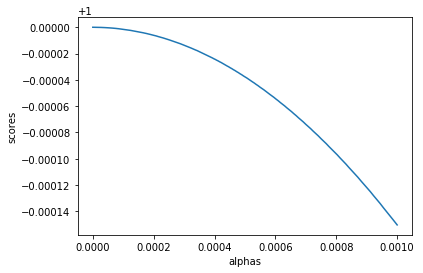

In [34]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as lm
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Lasso

alphas = np.logspace(-8,-3,1000)
rsquare = []
for d in alphas:
    lassoreg = Lasso(alpha=d,normalize=True, max_iter=1e4)
    lassoreg.fit(x,y)
    y_pred = lassoreg.predict(x)
    rsquare.append(lassoreg.score(x,y))

plt.plot(alphas,rsquare)
plt.xlabel('alphas')
plt.ylabel('scores')

d) Plot the training perforamnce versus the testing performance, and observe whree the test performance is
maximized. I've written an outline of the code you need.

In [36]:
#standardize data
scaler = StandardScaler()
std_x = x.as_matrix().astype(np.float)
std_x = scaler.fit_transform(x)

#split data into training and testing set
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(std_x, y, test_size=0.2, random_state=10)

#find optimal regularization parameter
train_score = list()
test_score = list()
for d in alphas:
    lassoreg = Lasso(alpha=d,normalize=True,max_iter=1e4)
    lassoreg.fit(x_train,y_train)
    train_score.append(lassoreg.score(x_train,y_train))
    test_score.append(lassoreg.score(x_test,y_test))
alpha_optim=0
i_alpha_optim = np.argmax(test_score)
alpha_optim = alphas[i_alpha_optim]
print ("Optimal regularization parameter : %s" % alpha_optim)

Optimal regularization parameter : 4.8270709656e-05


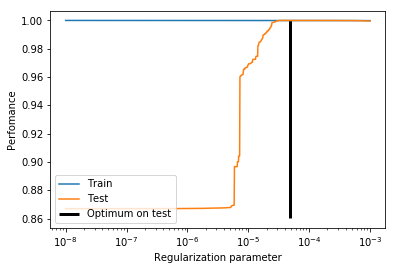

In [53]:
plt.semilogx(alphas,train_score,label='Train')
plt.semilogx(alphas, test_score, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_score), color='k',
           linewidth=3, label='Optimum on test')
plt.xlabel('Regularization parameter')
plt.ylabel('Perfomance')
plt.legend(loc='lower left')

e) Plot the top coefficients based on this optimal paramter. Why do you think so many are zero? 

<Container object of 500 artists>

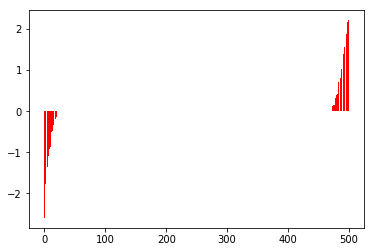

In [50]:
lassoreg = Lasso(alpha=alpha_optim,normalize=True,max_iter=1e4)
lassoreg.fit(x_train,y_train)
plt.bar(range(500),np.sort(lassoreg.coef_),color='r')

Becuase in lasso regression the constrain $\lambda \sum |\beta_i|$   makes it more likely to produce corner solutions, which results in more 0 coefficients. Lasso regression reduces the complexity and makes the model simple.

f) Compute the $R^2$ with the optimal coefficient found above on 5 folds using cross_val_score and plot the
results. Does the model work well on all random subsets?

Text(0,0.5,'Performance')

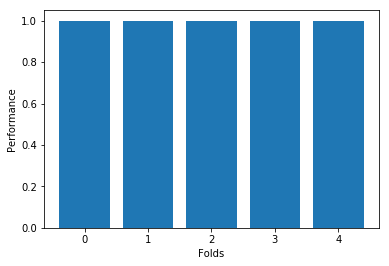

In [60]:
from sklearn.model_selection import cross_val_score
lassoreg = Lasso(alpha=alpha_optim,normalize=True,max_iter=1e4)
scores = cross_val_score(lassoreg,x,y,cv=5)
plt.bar(range(5),scores)
plt.xlabel('Folds')
plt.ylabel('Performance')

The scores for random subset 1 is: [ 0.99999777  0.99999704  0.99996479  0.99999688  0.9999974 ]
The scores for random subset 2 is: [ 0.99998716  0.99999569  0.99999238  0.99997832  0.99999805]
The scores for random subset 3 is: [ 0.99999607  0.99999699  0.9995225   0.99999508  0.99999655]
The scores for random subset 4 is: [ 0.99999675  0.99999531  0.99998928  0.99268731  0.99996722]


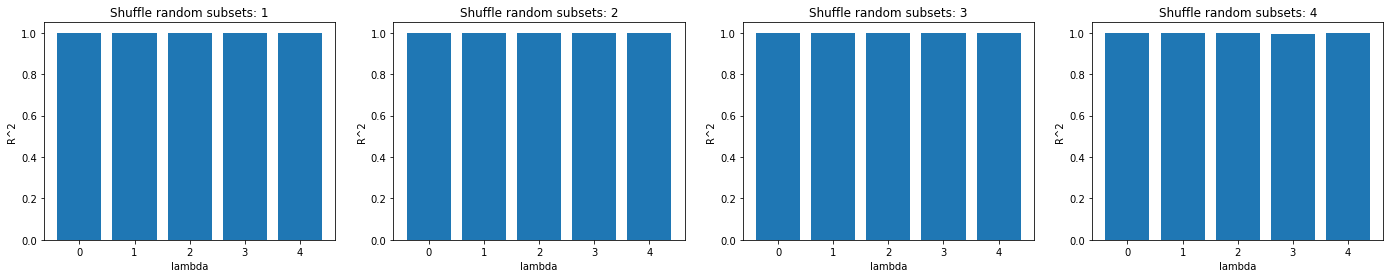

In [68]:
from sklearn.utils import shuffle
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth()*4)

# Construct training and testing set.
for m in range(4):
    x, y = shuffle(x, y)
    scores = cross_val_score(lassoreg, x, y, cv=5)
    axes = fig.add_subplot(1, 4, m+1)
    axes.set_xlabel('lambda')
    axes.set_ylabel('R^2')
    axes.set_title('Shuffle random subsets: ' + str(m+1))
    axes.bar(range(5),scores)
    print ("The scores for random subset %s is: %s" %(m+1,scores))

The result shows that the $R^2$ of all the random subsets are close to 1 which means the model performs well for all subsets.

g) Repeat e) but using cross validation. Use error bars on the features which are the standard deviation of the 
coefficiens obtained above. For this problem I"ll walk you through the code. You just need to apply your optimal
$\alpha$ found above. 

In [77]:
from sklearn.cross_validation import KFold
from sklearn import preprocessing
def run_cv_coeffs(x,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        x_train, x_test = x[train_index], x[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(x_train,y_train)
        y_pred[test_index] = clf.predict(x_test)
        coeffs.append(clf.coef_)
    return coeffs



scaler = preprocessing.StandardScaler()
x_scaled = x.as_matrix().astype(np.float)
x_scaled = scaler.fit_transform(x)

coeffs = run_cv_coeffs(x_scaled,np.array(y),Lasso,alpha=alpha_optim)

In [79]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(x.columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(x.columns))]
    return coeffs_avgd, coeffs_std
coeffs_avg,coeffs_std=get_coeffs(coeffs)

In [81]:
dfCoeffs = pd.DataFrame({'type':x.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})
dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ]
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))

AttributeError: 'DataFrame' object has no attribute 'sort'